In [1]:
import csv

def detect_csv_columns(file_path):
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        # Assuming the first row contains the headers
        first_row = next(reader, None)
        if first_row:
            return len(first_row)
        else:
            return 0

# Example usage:
csv_file_path = r'C:\Users\avisa\OneDrive\Desktop\Daily Tasks for LINKEDIN\task-7\breast-cancer.csv'
num_columns = detect_csv_columns(csv_file_path)

if num_columns:
    print(f'The CSV file has {num_columns} columns.')
else:
    print('The CSV file is empty or has no columns.')


The CSV file has 32 columns.


In [2]:
import csv

def detect_csv_columns_and_names(file_path):
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        # Assuming the first row contains the headers
        header_row = next(reader, None)
        if header_row:
            num_columns = len(header_row)
            return num_columns, header_row
        else:
            return 0, []

# Example usage:
csv_file_path = r'C:\Users\avisa\OneDrive\Desktop\Daily Tasks for LINKEDIN\task-7\breast-cancer.csv'
num_columns, column_names = detect_csv_columns_and_names(csv_file_path)

if num_columns:
    print(f'The CSV file has {num_columns} columns.')
    print('Column names:', ', '.join(column_names))
else:
    print('The CSV file is empty or has no columns.')


The CSV file has 32 columns.
Column names: id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst


In [5]:
import warnings

# Ignore FutureWarnings related to is_sparse deprecation
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv(r'C:\Users\avisa\OneDrive\Desktop\Daily Tasks for LINKEDIN\task-7\breast-cancer.csv')


# Drop 'id' column as it's not informative for the model
data = data.drop('id', axis=1)

# Encode the 'diagnosis' column to numerical values (Malignant = 1, Benign = 0)
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features (X) and target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Feature importance
feature_importance = rf_classifier.feature_importances_
print('Feature Importance:')
for i, feature in enumerate(X.columns):
    print(f'{feature}: {feature_importance[i]}')


Accuracy: 0.9649122807017544
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Feature Importance:
radius_mean: 0.048703371737755234
texture_mean: 0.013590877656998469
perimeter_mean: 0.053269746128179675
area_mean: 0.04755500886018552
smoothness_mean: 0.007285327830663239
compactness_mean: 0.013944325074050485
concavity_mean: 0.06800084191430111
concave points_mean: 0.10620998844591638
symmetry_mean: 0.003770291819290666
fractal_dimension_mean: 0.0038857721093275
radius_se: 0.02013891719419153
texture_se: 0.004723988073894702
perimeter_se: 0.01130301388178435
area_se: 0.022406960160458473
smoothness_se: 0.004270910110504497
compactness_se: 0.005253215538

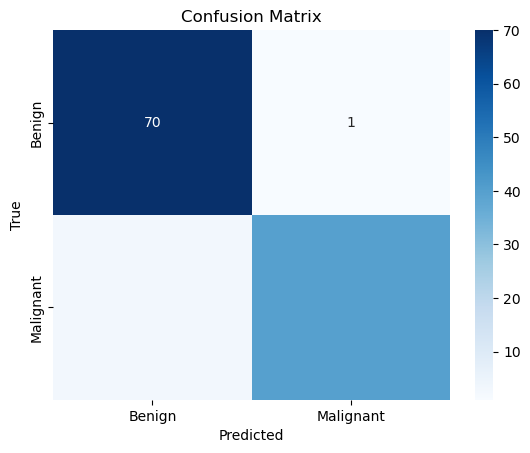

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


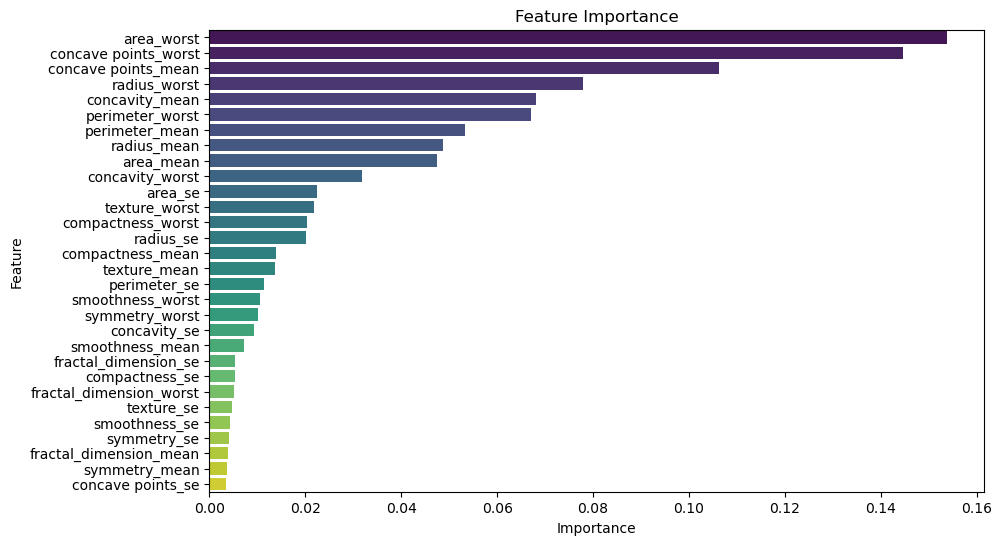

In [27]:
import warnings
import matplotlib.pyplot as plt

# Ignore FutureWarnings related to is_sparse deprecation
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")


# Plot feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


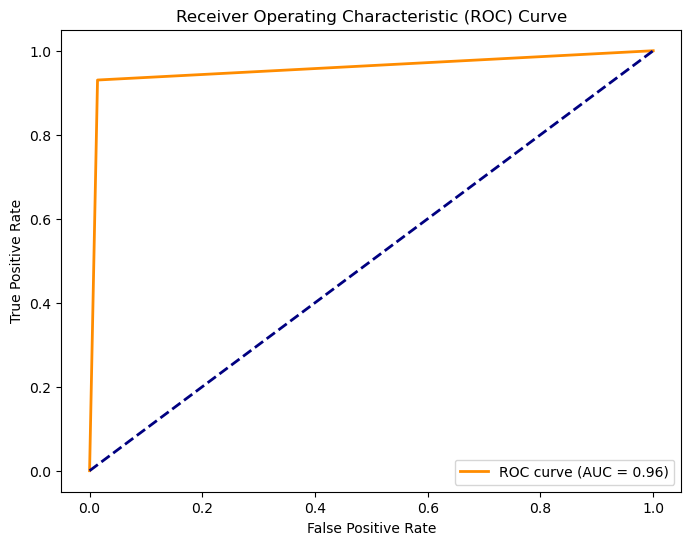

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


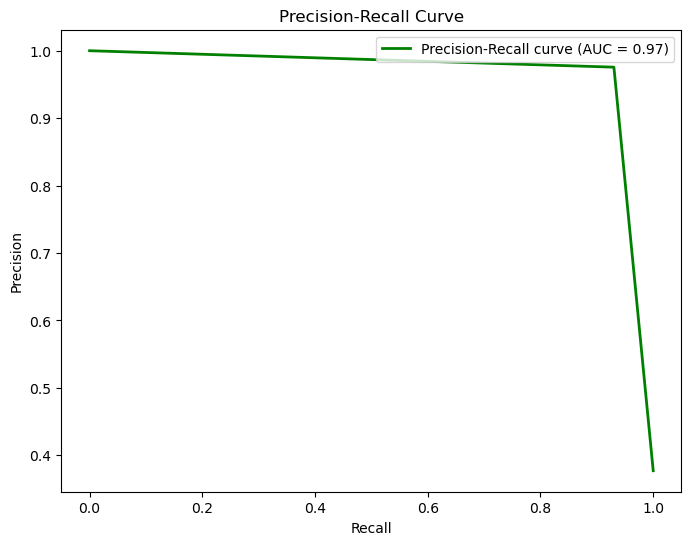

In [10]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


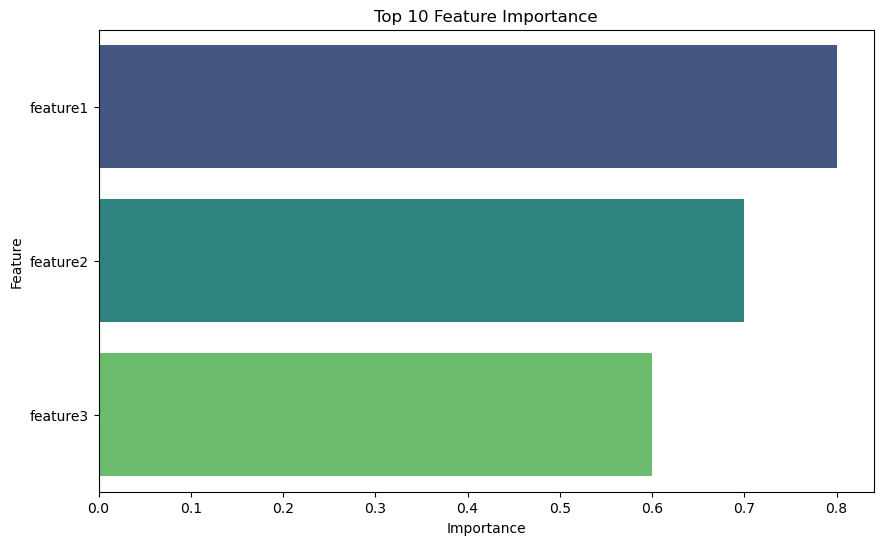

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Your feature importance DataFrame (replace this line with your actual DataFrame)
feature_importance_df = pd.DataFrame({'Feature': ['feature1', 'feature2', 'feature3'],
                                       'Importance': [0.8, 0.7, 0.6]})

# Temporarily suppress FutureWarnings during Seaborn plotting
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plot top N important features
    top_n = 10  # Adjust the number of features to display
    top_features_df = feature_importance_df.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')
    plt.title(f'Top {top_n} Feature Importance')
    plt.show()


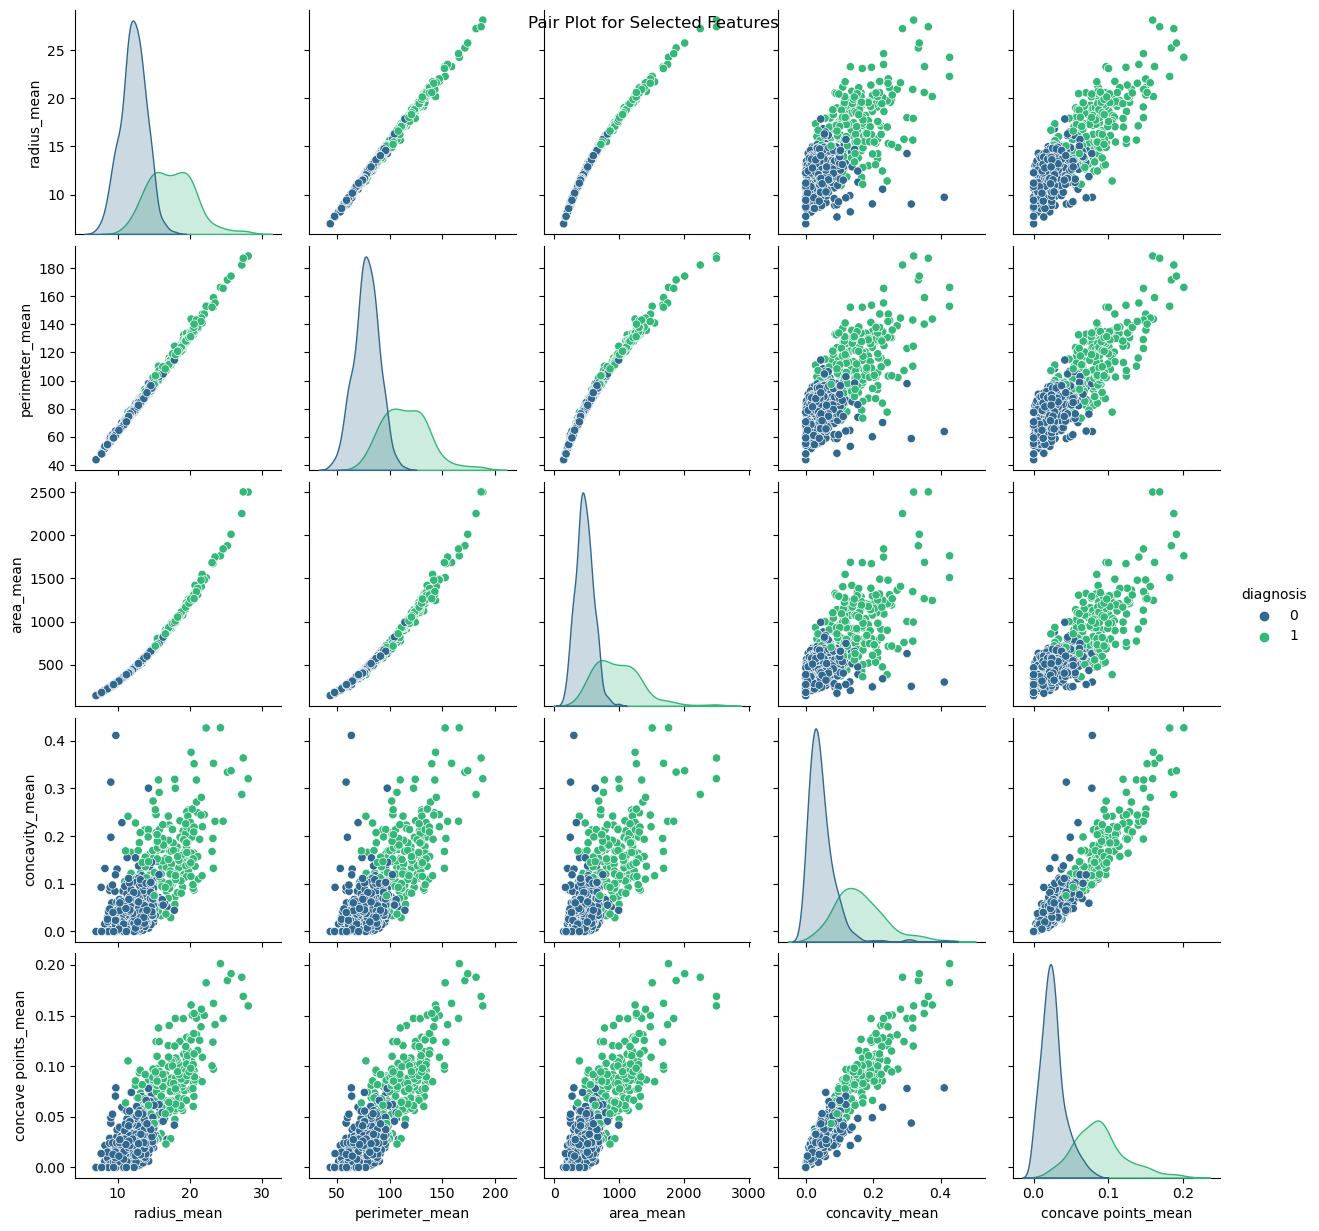

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings


# Choose a subset of features for pair plot (adjust as needed)
selected_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

# Combine selected features with the target variable for pair plot
pair_plot_data = pd.concat([X[selected_features], y], axis=1)

# Temporarily suppress FutureWarnings during Seaborn plotting
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plot pair plot
    sns.pairplot(pair_plot_data, hue='diagnosis', palette='viridis')
    plt.suptitle('Pair Plot for Selected Features')
    plt.show()


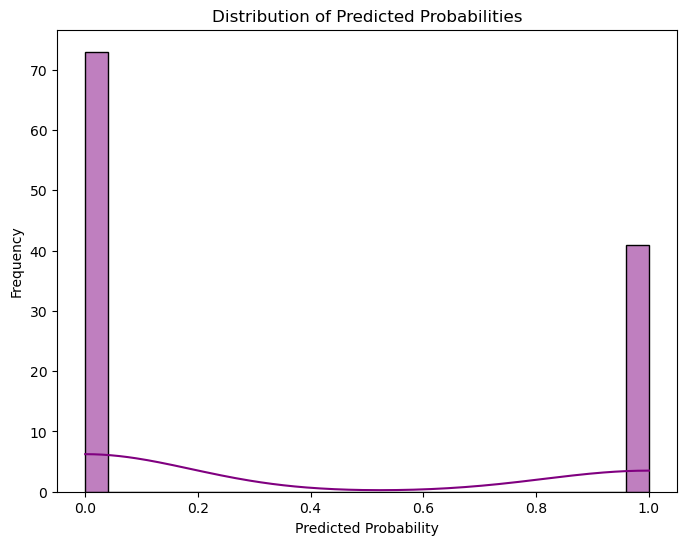

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Temporarily suppress FutureWarnings during Seaborn plotting
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plot the distribution of predicted probabilities
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred, bins=25, kde=True, color='purple')
    plt.title('Distribution of Predicted Probabilities')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.show()


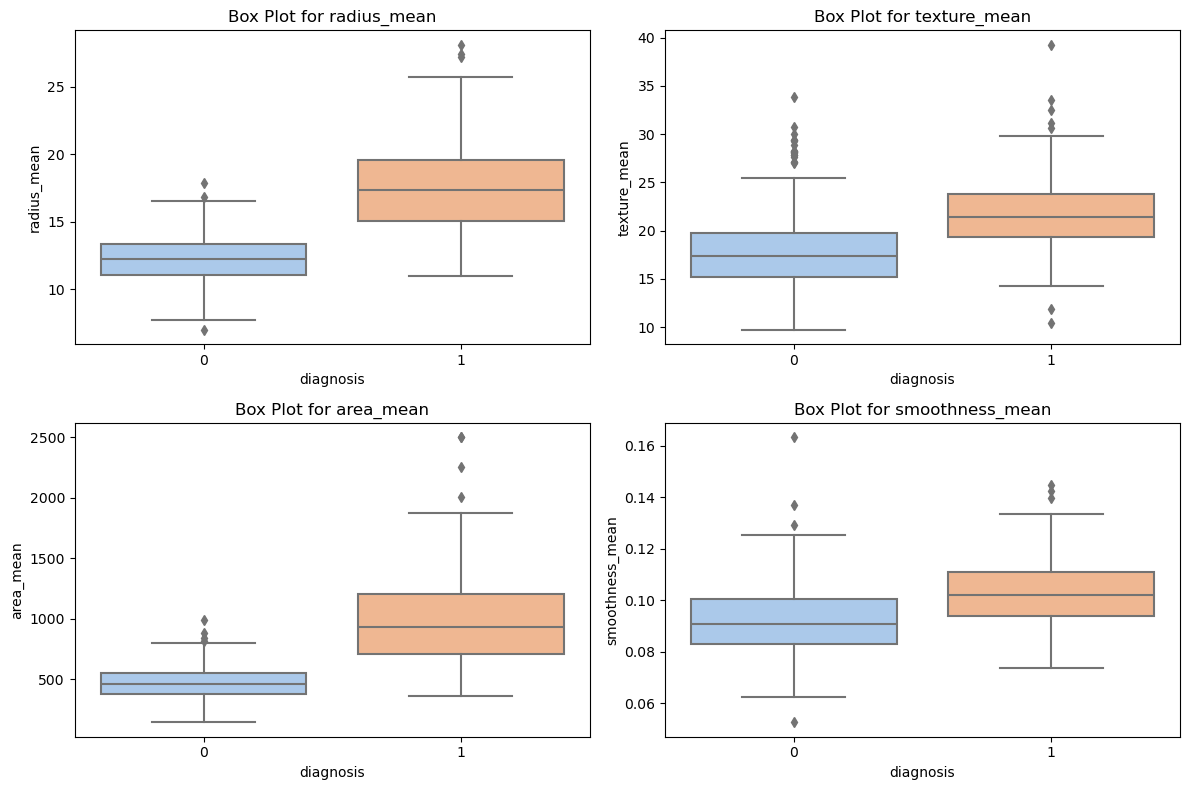

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Ignore FutureWarnings related to is_categorical_dtype deprecation in seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


# Choose a subset of features for box plots (adjust as needed)
selected_features_box = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']

# Combine selected features with the target variable for box plots
box_plot_data = pd.concat([X[selected_features_box], y], axis=1)

# Plot box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features_box, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=box_plot_data, palette='pastel')
    plt.title(f'Box Plot for {feature}')
plt.tight_layout()
plt.show()


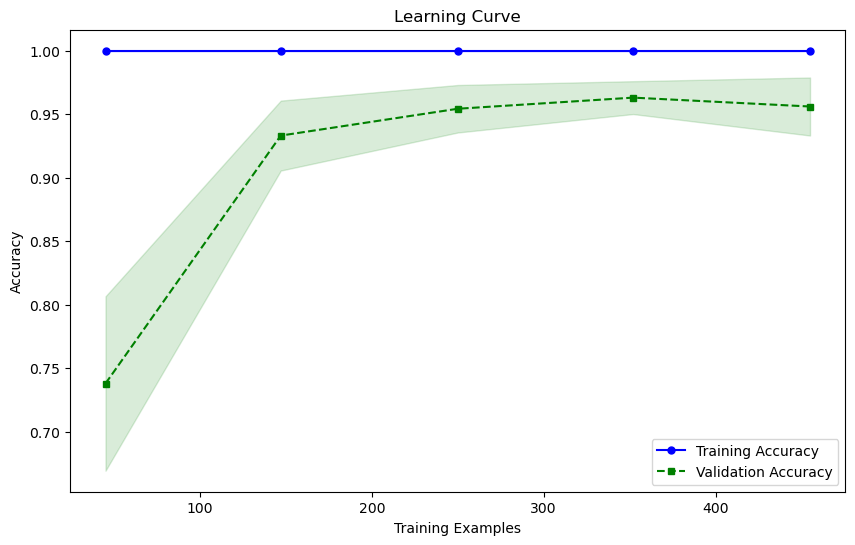

In [15]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


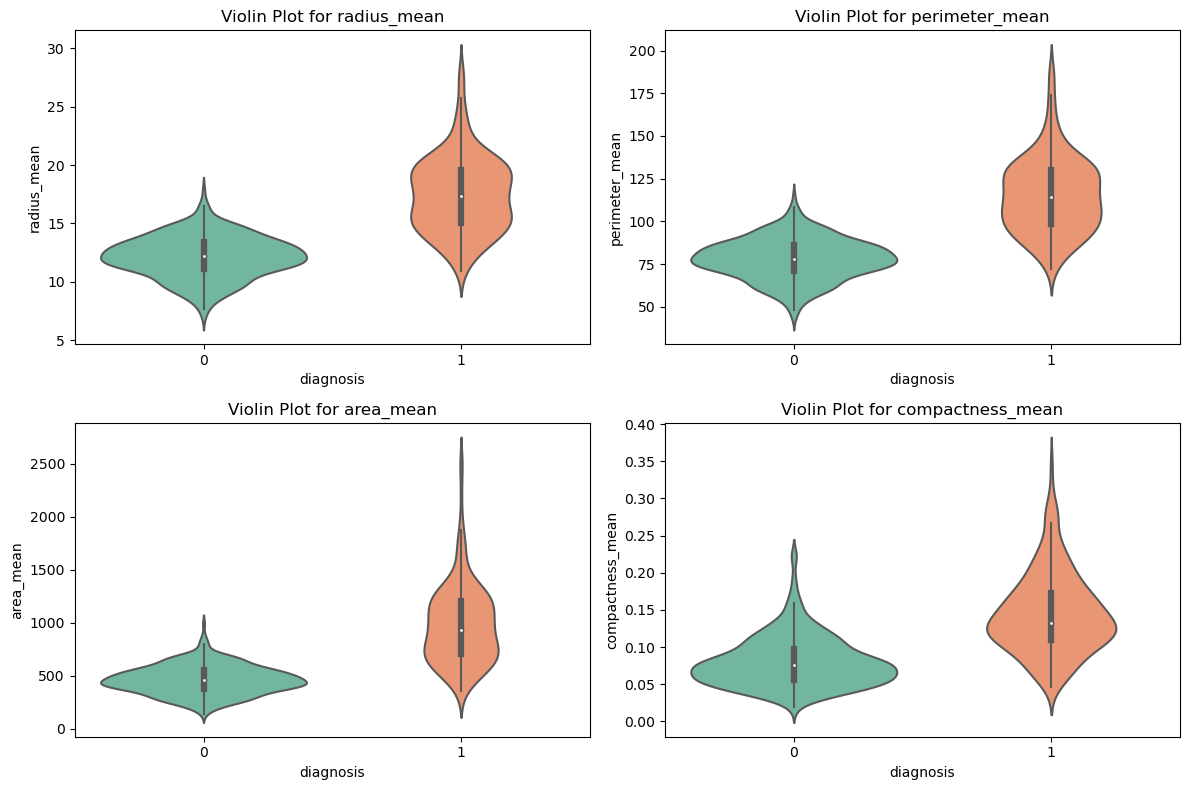

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Ignore FutureWarnings related to is_categorical_dtype deprecation in seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._core")


# Choose a subset of features for violin plots (adjust as needed)
selected_features_violin = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean']

# Combine selected features with the target variable for violin plots
violin_plot_data = pd.concat([X[selected_features_violin], y], axis=1)

# Plot violin plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features_violin, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='diagnosis', y=feature, data=violin_plot_data, palette='Set2')
    plt.title(f'Violin Plot for {feature}')
plt.tight_layout()
plt.show()


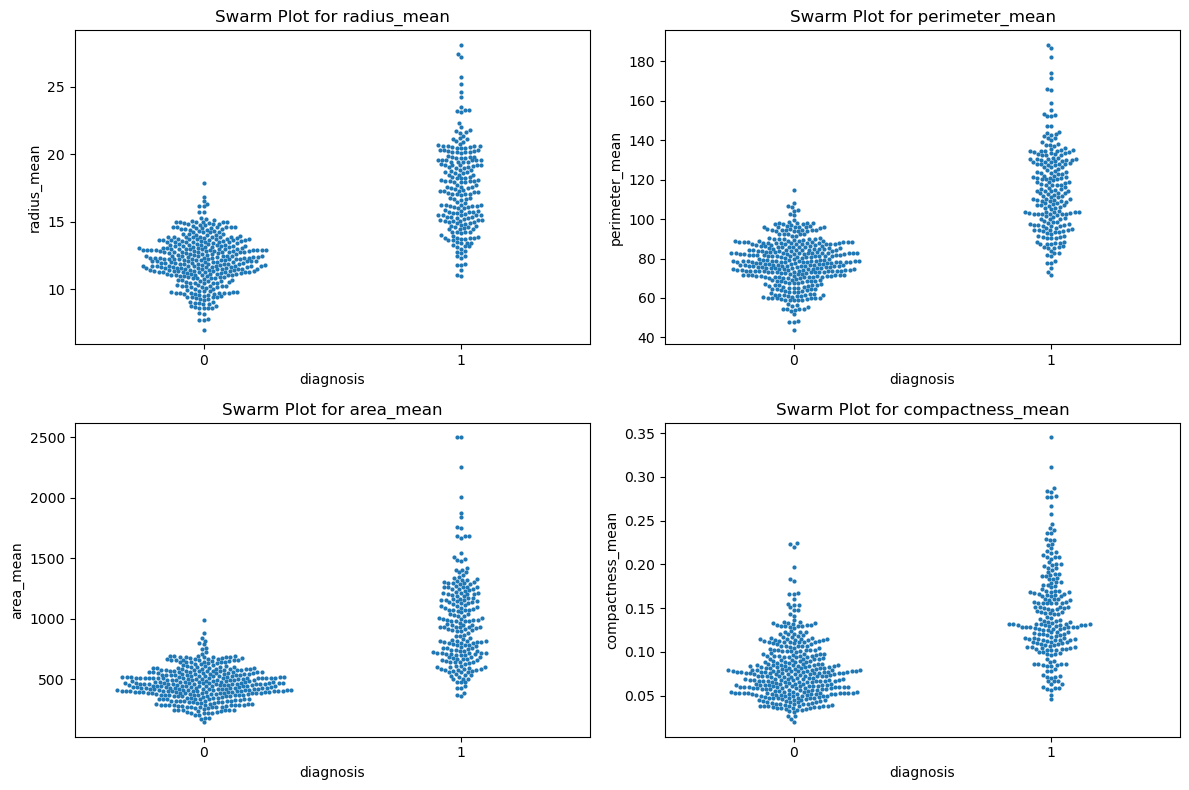

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Choose a subset of features for swarm plots (adjust as needed)
selected_features_swarm = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean']

# Combine selected features with the target variable for swarm plots
swarm_plot_data = pd.concat([X[selected_features_swarm], y], axis=1)

# Plot swarm plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features_swarm, 1):
    plt.subplot(2, 2, i)
    sns.swarmplot(x='diagnosis', y=feature, data=swarm_plot_data, size=3)  # Adjust size as needed
    plt.title(f'Swarm Plot for {feature}')
plt.tight_layout()
plt.show()


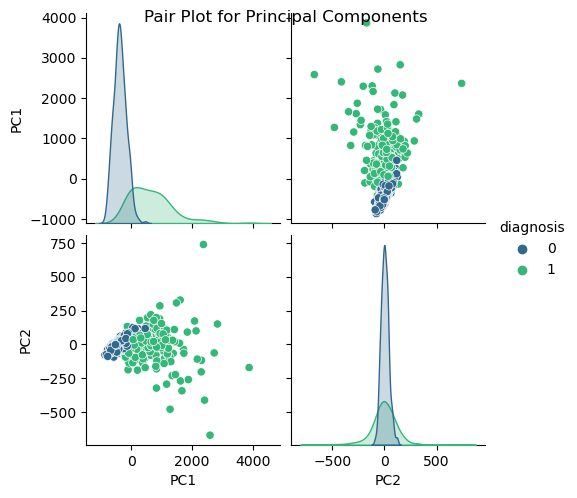

In [19]:
import warnings

# Ignore FutureWarnings related to is_categorical_dtype deprecation in seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create a DataFrame with the principal components and target variable
pca_df = pd.DataFrame(data={'PC1': pca_result[:, 0], 'PC2': pca_result[:, 1], 'diagnosis': y})

# Plot pair plot for principal components
sns.pairplot(pca_df, hue='diagnosis', palette='viridis')
plt.suptitle('Pair Plot for Principal Components')
plt.show()
